In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
terror = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding= 'ISO-8859-1')

In [4]:
terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [5]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state             64
Region             0
city               1
latitude         487
longitude        487
AttackType         1
Killed          2084
Wounded         3467
Target           143
Summary        13346
Group              1
Target_type        1
Weapon_type        1
Motive         13612
dtype: int64

In [10]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         14259 non-null  int64  
 1   Month        14259 non-null  int64  
 2   Day          14259 non-null  int64  
 3   Country      14259 non-null  object 
 4   state        14195 non-null  object 
 5   Region       14259 non-null  object 
 6   city         14258 non-null  object 
 7   latitude     13772 non-null  float64
 8   longitude    13772 non-null  float64
 9   AttackType   14258 non-null  object 
 10  Killed       12175 non-null  float64
 11  Wounded      10792 non-null  float64
 12  Target       14116 non-null  object 
 13  Summary      913 non-null    object 
 14  Group        14258 non-null  object 
 15  Target_type  14258 non-null  object 
 16  Weapon_type  14258 non-null  object 
 17  Motive       647 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

Destructive Feature of Data

In [11]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: United Kingdom
City with the most attacks: San Salvador
Region with the most attacks: Western Europe
Year with the most attacks: 1979
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


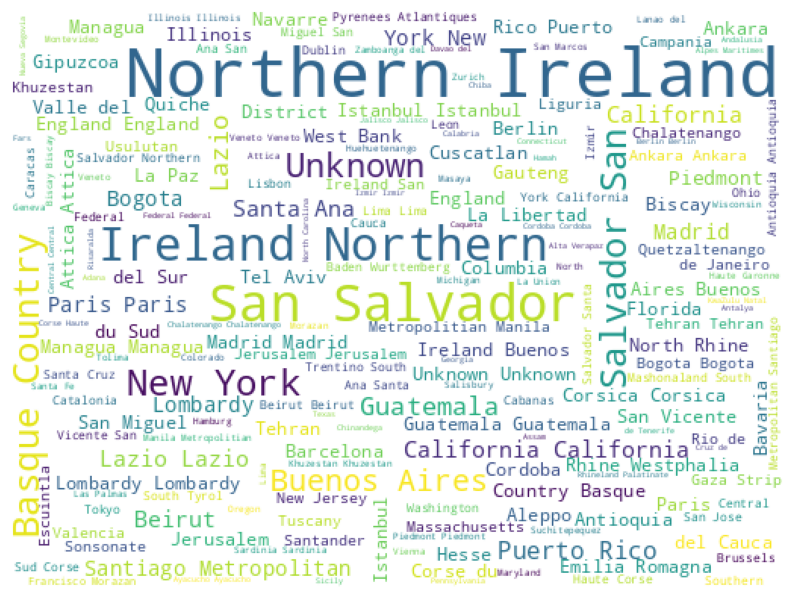

In [12]:
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [13]:
terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    1682
1986       1
Name: Year, dtype: int64

DATA VISUALISATION

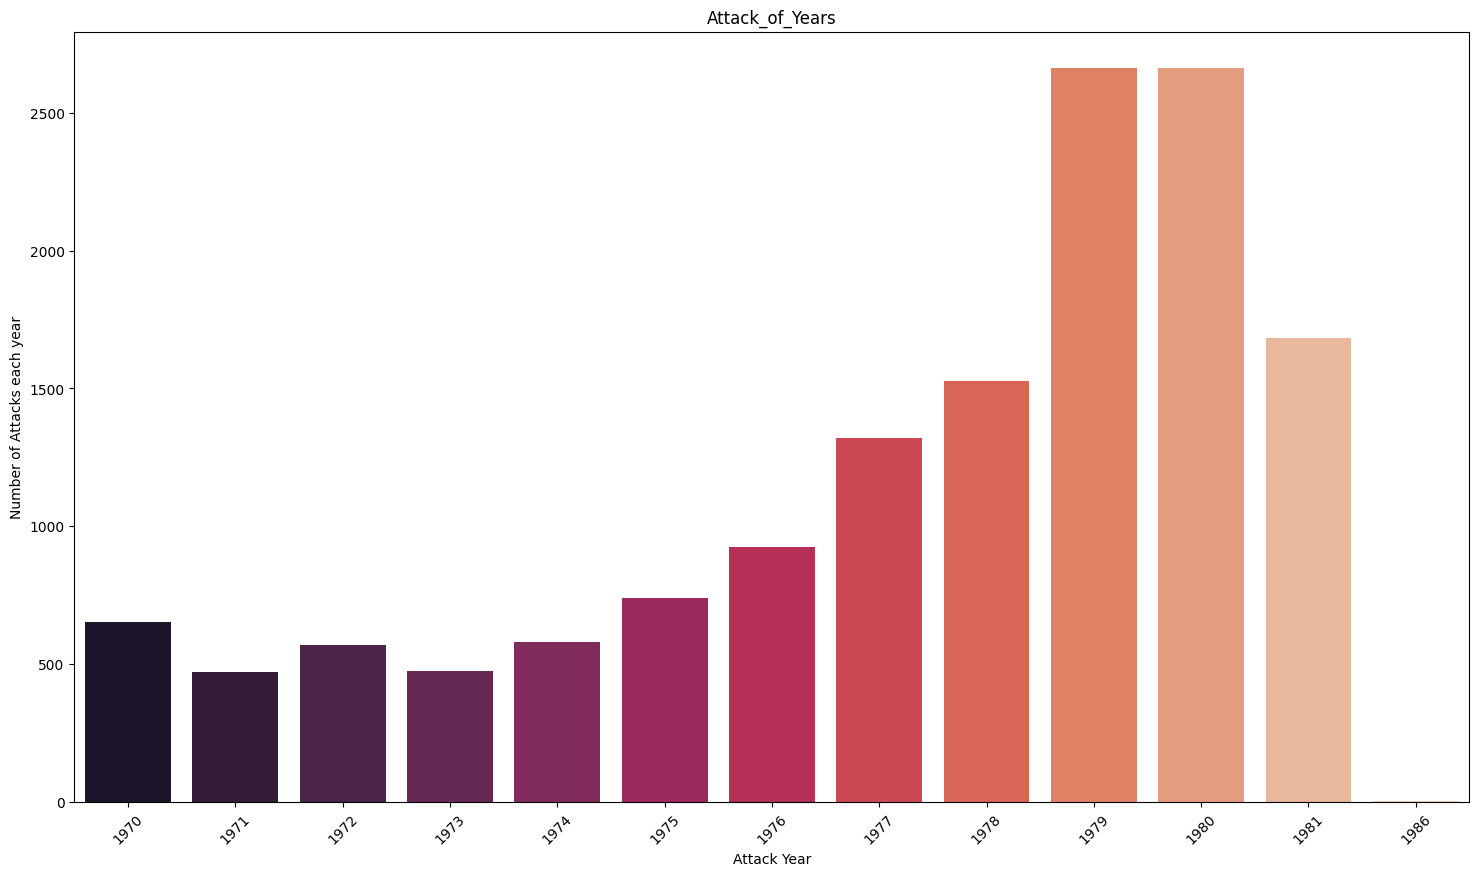

In [14]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

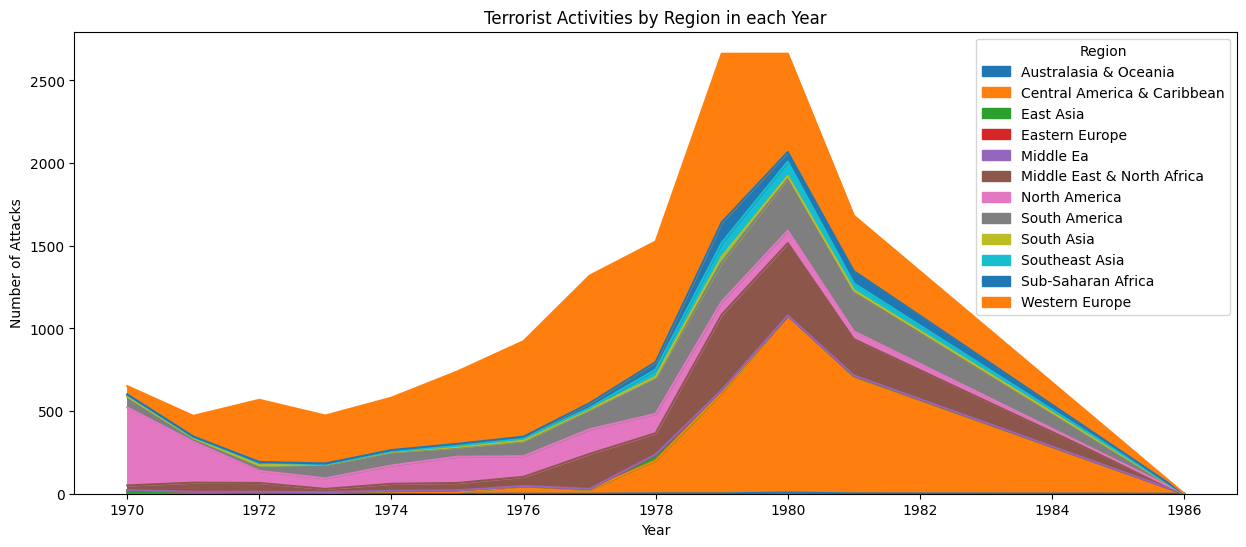

In [17]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [19]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [20]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [21]:
heat.head()

Year         1972  1973  1974  1975  1976  1977  1978   1979   1980  1981
Country                                                                  
Argentina     0.0   0.0   0.0  92.0   0.0   0.0   0.0    0.0    0.0   0.0
Bangladesh    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   86.0   0.0
El Salvador   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  220.0  93.5
Ethiopia      0.0   0.0   0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0
Greece        0.0   0.0  88.0   0.0   0.0   0.0   0.0    0.0    0.0   0.0

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)


In [24]:
terror.Country.value_counts()[:15]

United Kingdom        1861
United States         1587
El Salvador           1585
Italy                 1181
Spain                 1175
Colombia               659
Guatemala              632
France                 612
Turkey                 585
Nicaragua              345
Argentina              336
Iran                   316
West Germany (FRG)     312
Israel                 304
Lebanon                225
Name: Country, dtype: int64

ANALYSIS ON CUSTOMIZED DATA

In [26]:
import folium
from folium.plugins import MarkerCluster
filterYear = terror['Year'] == 1970

In [27]:
filterData = terror[filterYear]

reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()


In [28]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)

markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attack in 1970 were carried out on the American Continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.


Now let us check out which terrorist organization have carried out their operation in each country. A value count would give us the terriost organization that have carried out the most attack. we have indexed from 1 as to negate the value of 'Unknown'.

In [29]:
terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                         1183
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         265
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Revolutionary Armed Forces of Colombia (FARC)        175
Ulster Volunteer Force (UVF)                         175
Left-Wing Militants                                  170
Corsican National Liberation Front (FLNC)            169
People's Liberation Forces (FPL)                     167
M-19 (Movement of April 19)                          142
Black September                                      120
Name: Group, dtype: int64

In [30]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [31]:
test.Country.unique()

array(['Peru'], dtype=object)

In [32]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

['Palestinians' 'Irish Republican Army (IRA)'
 'Sandinista National Liberation Front (FSLN)' 'Protestant extremists'
 'Basque Fatherland and Freedom (ETA)' 'Red Brigades'
 'Farabundo Marti National Liberation Front (FMLN)']


In [33]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

The Abvoe map looks untidy even though it can be zoomed in the view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive

In [35]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']])
    popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)

folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [36]:
terror.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0       1        0             Julio Guzman     NaN   
1       0        0  Nadine Chaval, daughter     NaN   
2       1        0                 Employee     NaN   
3       0        0             U.S. Embassy     NaN   
4       0        0           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  casualities  
0     Unknown    NaN            1  
1     Unknown    NaN            0  
2     Unknown    NaN            1  
3  Explosives    NaN            0  
4  Incendiary    NaN            0

In [37]:
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 14609


In [38]:
attackData = terror.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [39]:
typeKillData.head()

AttackType  Killed
0                   Assassination       1
1     Hostage Taking (Kidnapping)       0
2                   Assassination       1
3               Bombing/Explosion       0
4  Facility/Infrastructure Attack       0

In [40]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed               6112           3010               3430   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                                 552        184   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                      212                          331   

AttackType  Unarmed Assault  Unknown  
Killed                   17      761

In [41]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


In [46]:
countryData = terror.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)

In [47]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Argentina  Australia  \
Killed            53        0        0        0      19        328          5   

Country  Austria  Bahamas  Bahrain  ...  Uruguay  Vatican City  Venezuela  \
Killed        12        0        0  ...        4             0          5   

Country  West Bank and Gaza Strip  West Germany (FRG)  Western Sahara  \
Killed                         46                  63               0   

Country  Yugoslavia  Zaire  Zambia  Zimbabwe  
Killed            2      1       5        26  

[1 rows x 121 columns]

In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

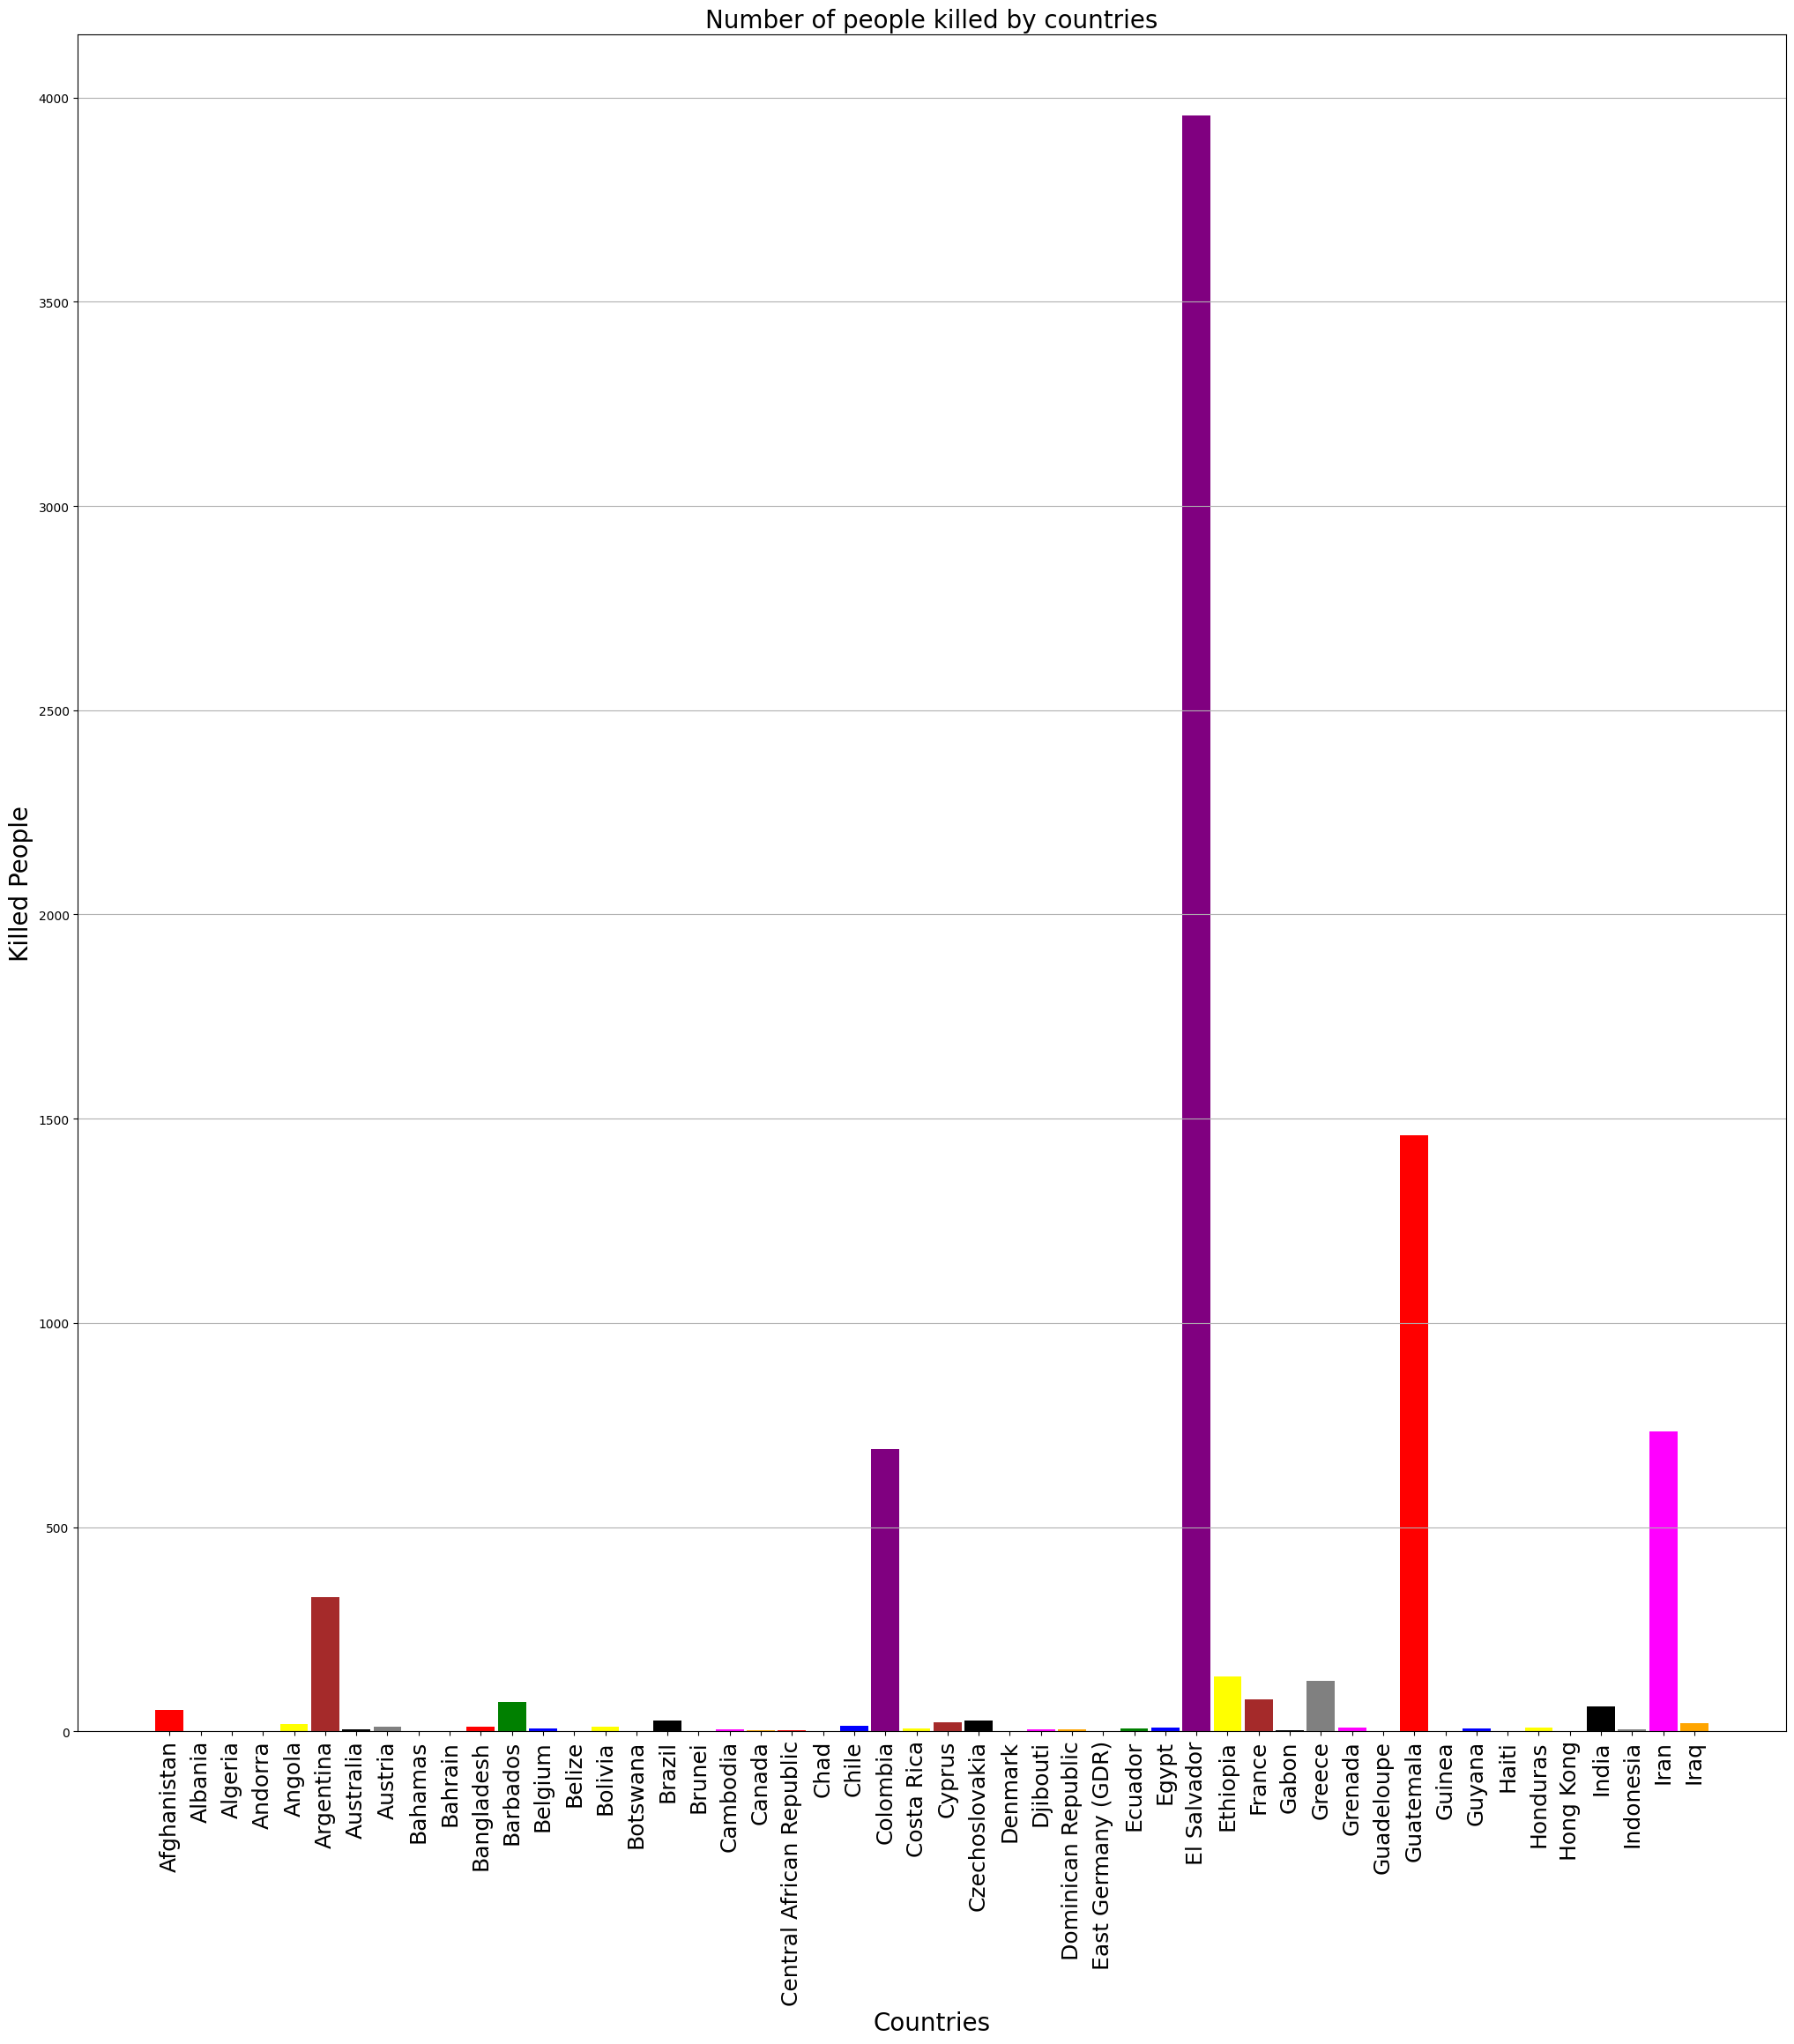

In [49]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

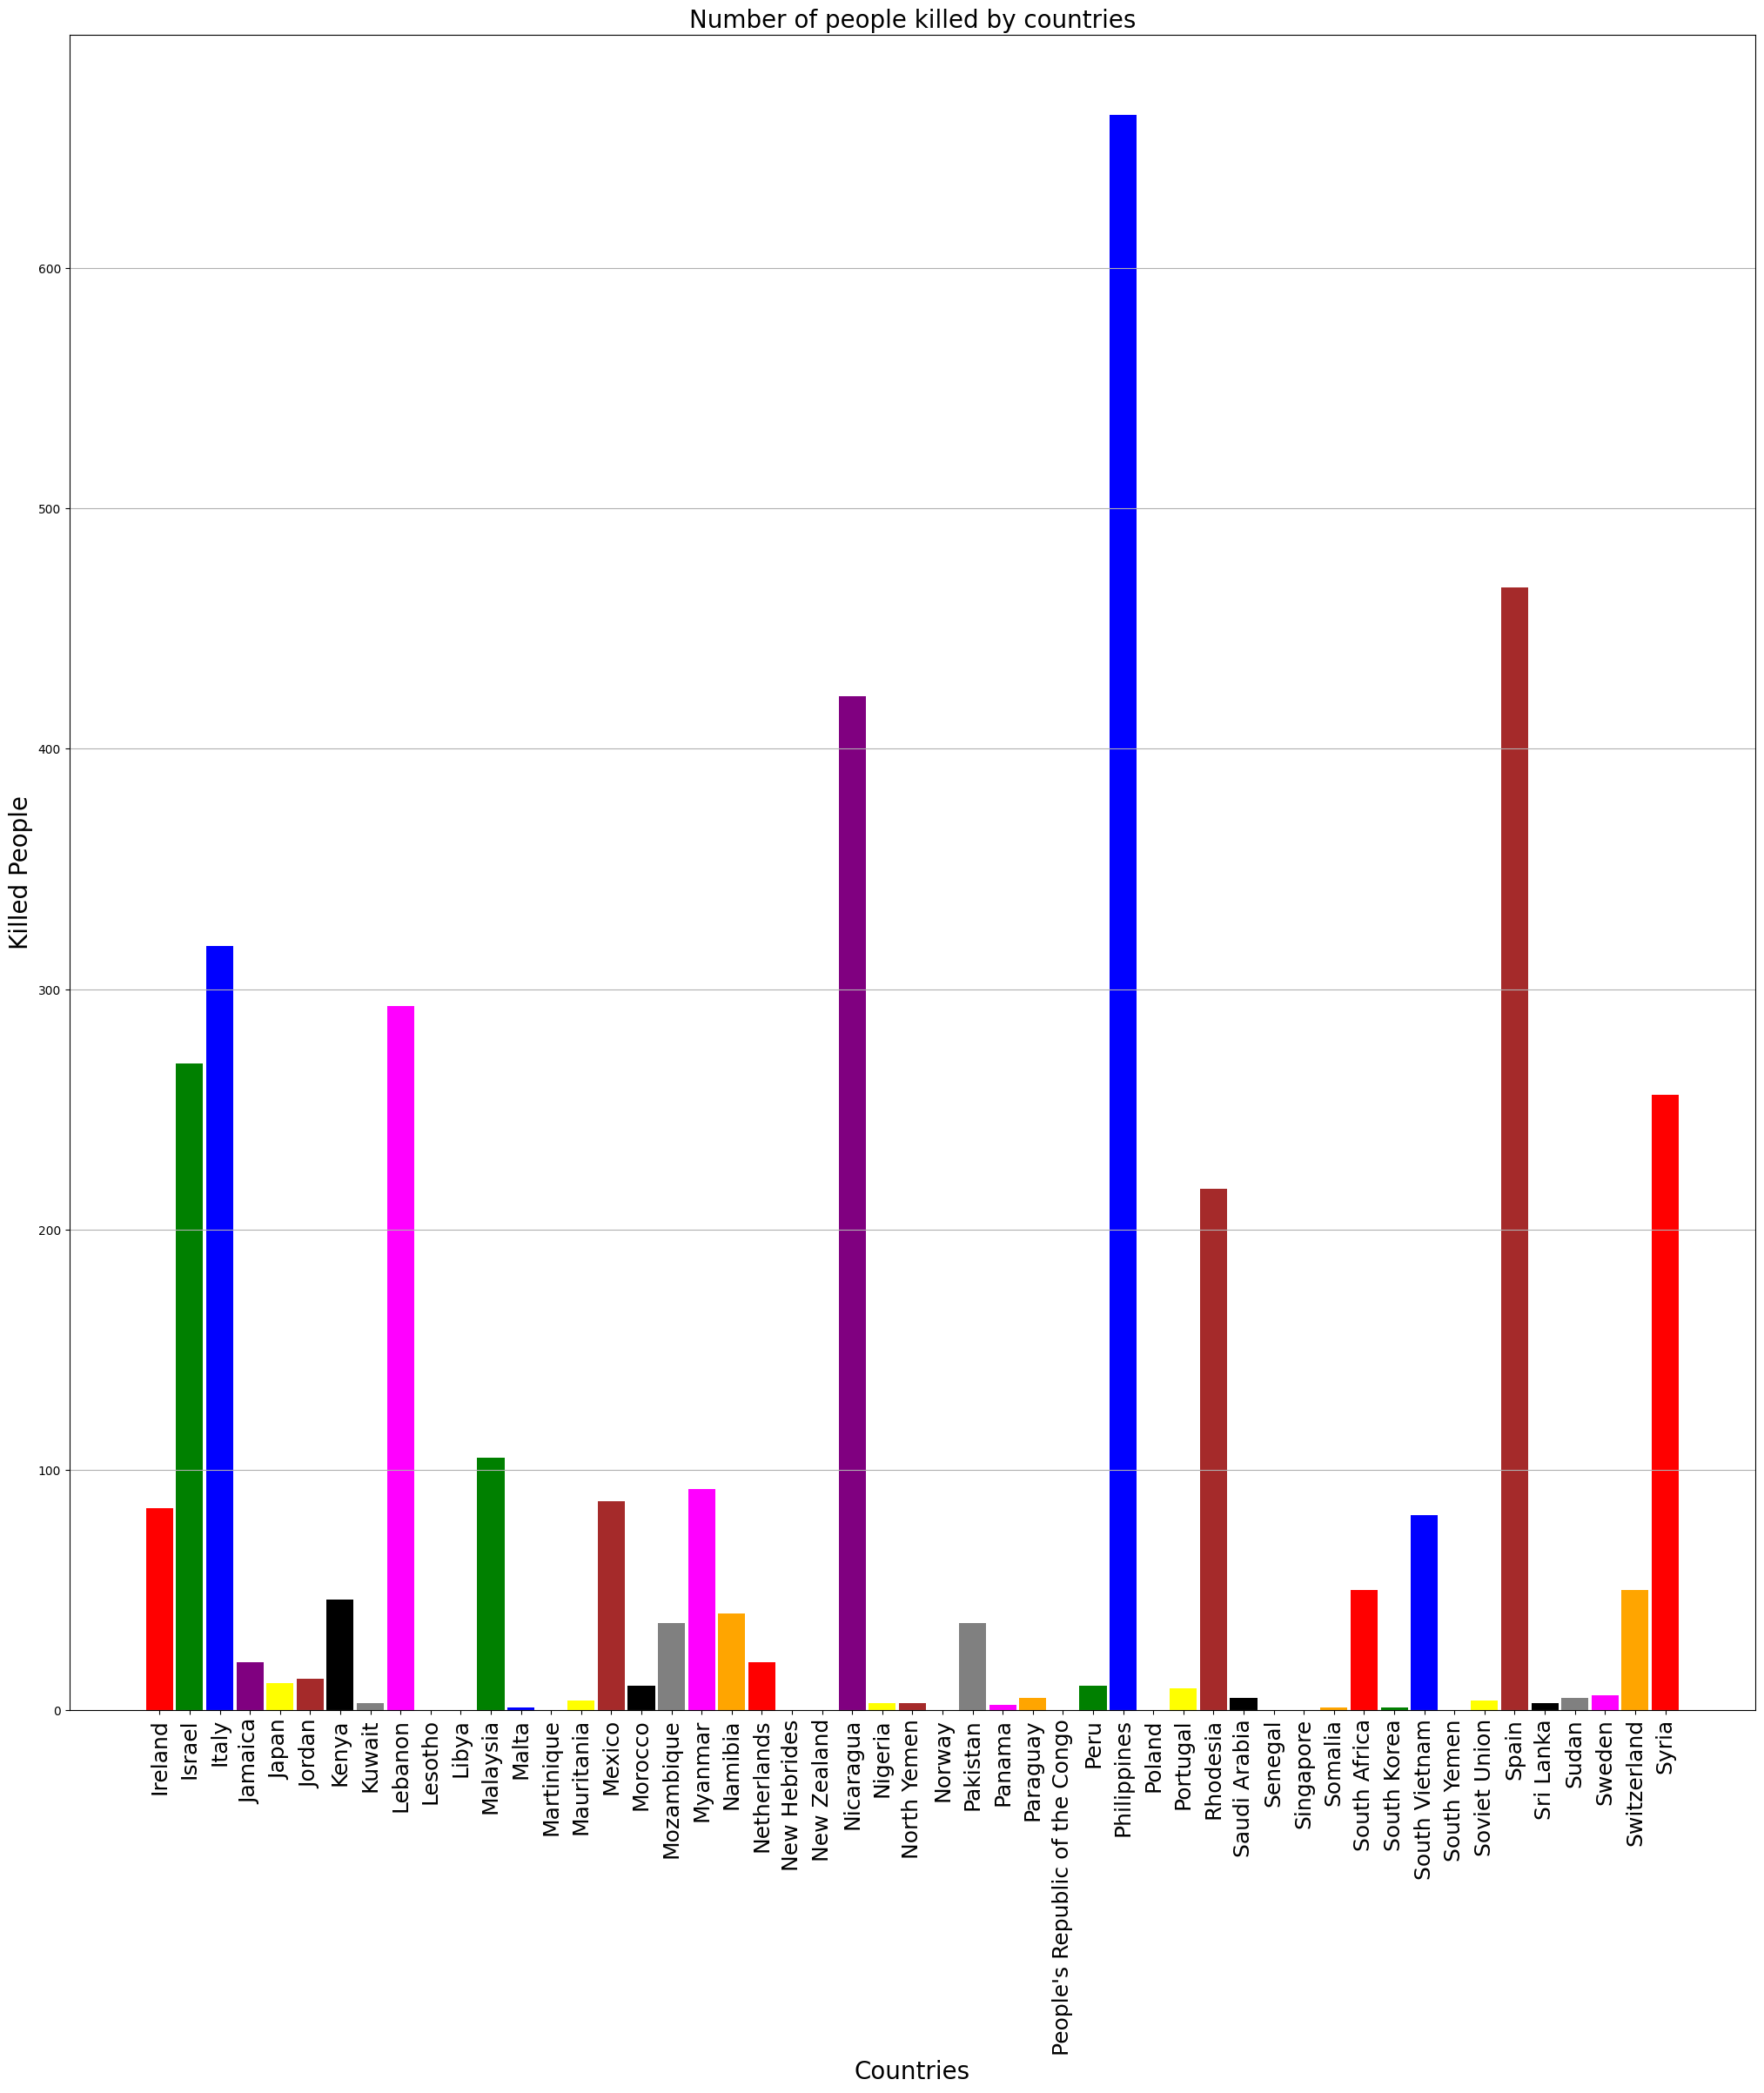

In [50]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terroist attacks. In addition, even through there is a perception that Muslims are supported of terrorism, Muslims are the people who are the most damaged by the terrorist attack. If you look at the graphics, it appear that Iraq, Afghanisation and Pakistan are the most damaged countries. All of these countries are muslim countries.